#              ***GENDER RECOGIZATION USING VOICE (ACOUSTIC VALUES)***

### Problem Statement
#### Gender Recognition by Voice and Speech Analysis - This is a dataset originally created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

#### Aim - Split the given dataset into training and validation datasets and build a classifier on the training data and validate its performance on the validation dataset.

##  **Step 1: Importing  required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

import sklearn
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Explanation:

import numpy as np: Imports the NumPy library and aliases it as `np` for easier reference in the code.
import pandas as pd: Imports the pandas library and aliases it as `pd` for easier reference in the code.
import matplotlib.pyplot as plt: Imports the pyplot module from the Matplotlib library and aliases it as `plt` for easier reference in the code, used for creating visualizations.
import seaborn as sns: Imports the seaborn library, which provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.preprocessing import LabelEncoder: Imports the LabelEncoder class from the preprocessing module of scikit-learn, used for encoding categorical features as integers.
from sklearn.model_selection import train_test_split: Imports the train_test_split function from scikit-learn, used for splitting datasets into training and testing sets.
from sklearn.linear_model import LogisticRegression: Imports the LogisticRegression class from scikit-learn, used for logistic regression modeling.
from sklearn.neighbors import KNeighborsClassifier: Imports the KNeighborsClassifier class from scikit-learn, used for k-nearest neighbors classification.
from sklearn.tree import DecisionTreeClassifier: Imports the DecisionTreeClassifier class from scikit-learn, used for decision tree-based classification.
from sklearn.ensemble import RandomForestClassifier: Imports the RandomForestClassifier class from scikit-learn, used for random forest-based classification.
from sklearn.naive_bayes import BernoulliNB, GaussianNB: Imports the BernoulliNB and GaussianNB classes from scikit-learn, used for Bernoulli and Gaussian Naive Bayes classification, respectively.
import sklearn: Imports the scikit-learn library.
from sklearn import metrics: Imports the metrics module from scikit-learn, used for evaluating model performance.
import warnings: Imports the warnings module, used for handling warnings in the code.
warnings.filterwarnings('ignore'): Sets up the code to ignore warnings, which can be useful for cleaner output during execution.

##  **Step 2: Data-Analysis**

### 1.Importing the dataset:

In [2]:
voice_data=pd.read_csv('C:/Users/malli/Downloads/FF/ML_PROJECT_-2--main/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


This code reads a CSV file named 'C:/Users/malli/Downloads/FF/ML_PROJECT_-2--main/voice.csv' into a Pandas DataFrame named df, which represents tabular data. The DataFrame df contains the data from the CSV file and will allow for further data manipulation and analysis using Pandas functions.

### 2.Data-proporties

#### Shape:

In [3]:
Shape=voice_data.shape
print(f" no.of rows={Shape[0]}\n no.of columns={Shape[1]}")

 no.of rows=3168
 no.of columns=21


This retrieves the shape of the DataFrame voice_data, assuming it's a pandas DataFrame, and prints out the number of rows and columns in the DataFrame

#### Columns:

In [4]:
cols=pd.DataFrame(data=voice_data.columns,index=range(1,22))
cols

,0
1,meanfreq
2,sd
3,median
4,Q25
5,Q75
6,IQR
7,skew
8,kurt
9,sp.ent
10,sfm


This code creates a pandas DataFrame called cols containing the column names of the DataFrame voice_data.

#### Information of the dataset:

In [5]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

The info() method in pandas DataFrame provides a concise summary of the DataFrame, including information about the index dtype and column dtypes, non-null values, and memory usage. This is helpful for understanding the structure and composition of the DataFrame.

####  DataType of each column

In [6]:
voice_data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

voice_data.dtypes returns a pandas Series containing the data types of each column in the DataFrame voice_data. Each entry in the Series represents the data type of the corresponding column.

#### Description of the dataset

In [7]:
voice_data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


voice_data.describe().T computes summary statistics for numerical columns in the DataFrame voice_data and transposes the result. 

## **Step 3 : Data Preprocess**
#### 1.Data cleaning (if null values present) ,
#### 2.Label Encoding (for Target column)  ,
#### 3.Shuffle the dataset ,
#### 4.Split the data into training and testing sets.

In [8]:
#checking for nullvalues
df1=voice_data.count()
df2=voice_data.isnull().sum()
null_info=pd.concat([df1,df2],axis=1)
null_info=null_info.rename(columns={0:'Total_count',1:'NUll_count'})
null_info

,Total_count,NUll_count
meanfreq,3168,0
sd,3168,0
median,3168,0
Q25,3168,0
Q75,3168,0
IQR,3168,0
skew,3168,0
kurt,3168,0
sp.ent,3168,0
sfm,3168,0


This code calculates the total count of non-null values (Total_count) and the count of null values (NUll_count) for each column in the DataFrame voice_data, and then combines these counts into a new DataFrame called null_info. 

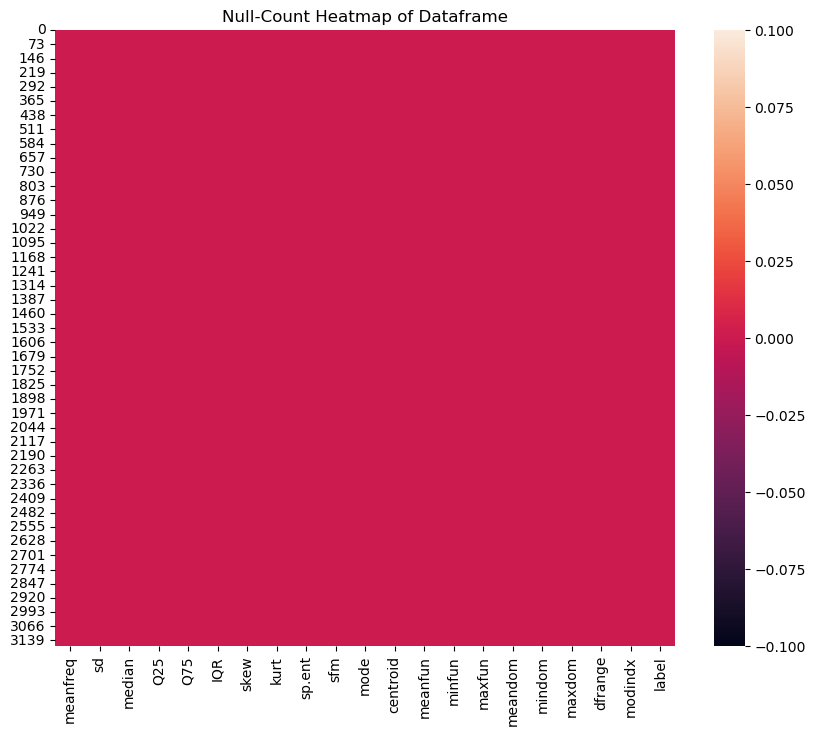

In [9]:
#NULL-COUNT Heatmap

plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(voice_data.isnull())
plt.title("Null-Count Heatmap of Dataframe")
plt.savefig('null_count_heatmap.jpg')
plt.show()


This code creates a heatmap using seaborn (sns) to visualize the null values in the DataFrame voice_data.

In [10]:
#before label encoding
print(voice_data['label'],voice_data['label'].dtype)

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object object


 print(voice_data['label'], voice_data['label'].dtype) will display both the values and the data type of the 'label' column in voice_data.

In [11]:
#Encoding the label because label is obj type system only understand numeric values
label_encoder=LabelEncoder()
voice_data['label']=label_encoder.fit_transform(voice_data['label'])

The labels in the 'label' column will be encoded with numerical values. This is often necessary when working with categorical data in machine learning algorithms that require numerical input.

In [12]:
# after label encoding
print(voice_data['label'],voice_data['label'].dtype)

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int32 int32


The code encodes the categorical labels in the 'label' column of voice_data into numerical values using scikit-learn's LabelEncoder.

In [13]:
#befor shuffling the data
voice_data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Printing the first 5 rows of voice_data will display a snapshot of the DataFrame after applying the LabelEncoder to the 'label' column. 

In [14]:
#after shuffling the data
shuffled_voice_data=voice_data.sample(frac=1).reset_index(drop=True)
shuffled_voice_data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.182238,0.076138,0.206618,0.138760,0.232995,0.094235,2.696652,12.957694,0.912982,0.448560,...,0.182238,0.139618,0.015686,0.275862,0.845109,0.031250,6.945312,6.914062,0.128797,0
1,0.195680,0.059589,0.221934,0.130025,0.248295,0.118270,2.477426,9.361352,0.880763,0.314705,...,0.195680,0.125406,0.054299,0.277457,1.091146,0.023438,5.390625,5.367188,0.148199,1
2,0.159905,0.077485,0.168107,0.098551,0.223964,0.125413,1.055363,4.512376,0.972912,0.776357,...,0.159905,0.092796,0.015952,0.262295,0.667690,0.007812,2.570312,2.562500,0.264390,1
3,0.190311,0.061230,0.191111,0.134603,0.246667,0.112063,1.172105,3.206939,0.899916,0.322658,...,0.190311,0.131092,0.047666,0.279070,1.241319,0.023438,15.703125,15.679688,0.037961,1
4,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,...,0.180360,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314,1


This code randomly shuffles the rows of the DataFrame voice_data and resets the index to reflect the new order.

In [15]:
#splitting the data
x=shuffled_voice_data.iloc[:,:-1]
y=shuffled_voice_data['label']

After executing this code, x will contain the feature values of the shuffled dataset, and y will contain the corresponding labels. This separation is often done to prepare the data for training machine learning models, where x is used as input features and y is used as the target variable for training and evaluation.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("no.of samples in train_set:",x_train.shape[0])
print("no.of samples in test_set:",x_test.shape[0])

no.of samples in train_set: 2534
no.of samples in test_set: 634


After executing this code, you'll have x_train and y_train for training your machine learning model, and x_test and y_test for evaluating its performance. The training set contains 80% of the data, while the testing set contains 20%.

## **Explotary Data Analysis(EDA)**
#### An approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

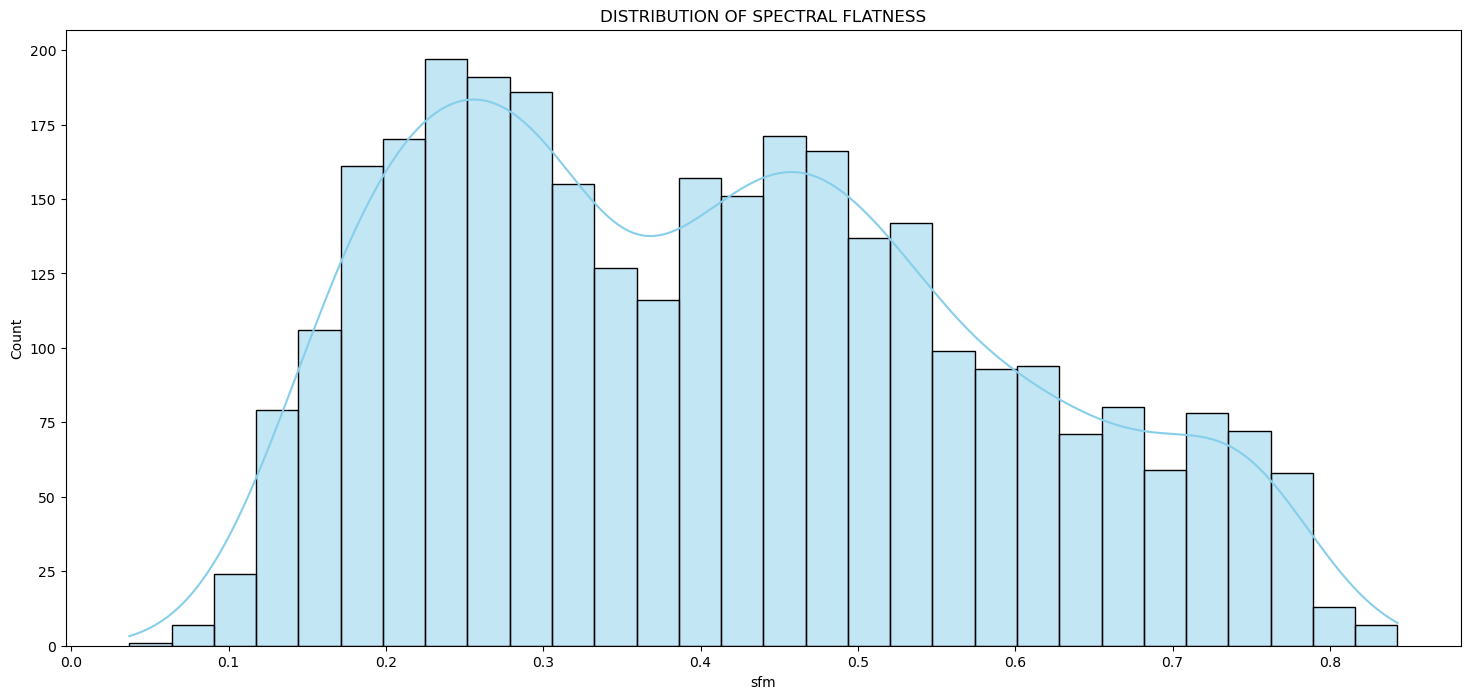

In [17]:
#checking the distribution of data.

plt.figure(figsize=(18,8))
sns.histplot(voice_data.sfm, color='skyblue',bins=30,kde=True)
plt.title("DISTRIBUTION OF SPECTRAL FLATNESS")
plt.savefig('DISTRIBUTION_OF_SPECTRAL_FLATNESS.jpg')
plt.show()

This code generates a histogram to visualize the distribution of the 'sfm' (spectral flatness measure) feature in the DataFrame voice_data using seaborn's histplot function.The resulting histogram will show the distribution of the 'sfm' feature, providing insights into its range and distribution in the dataset.

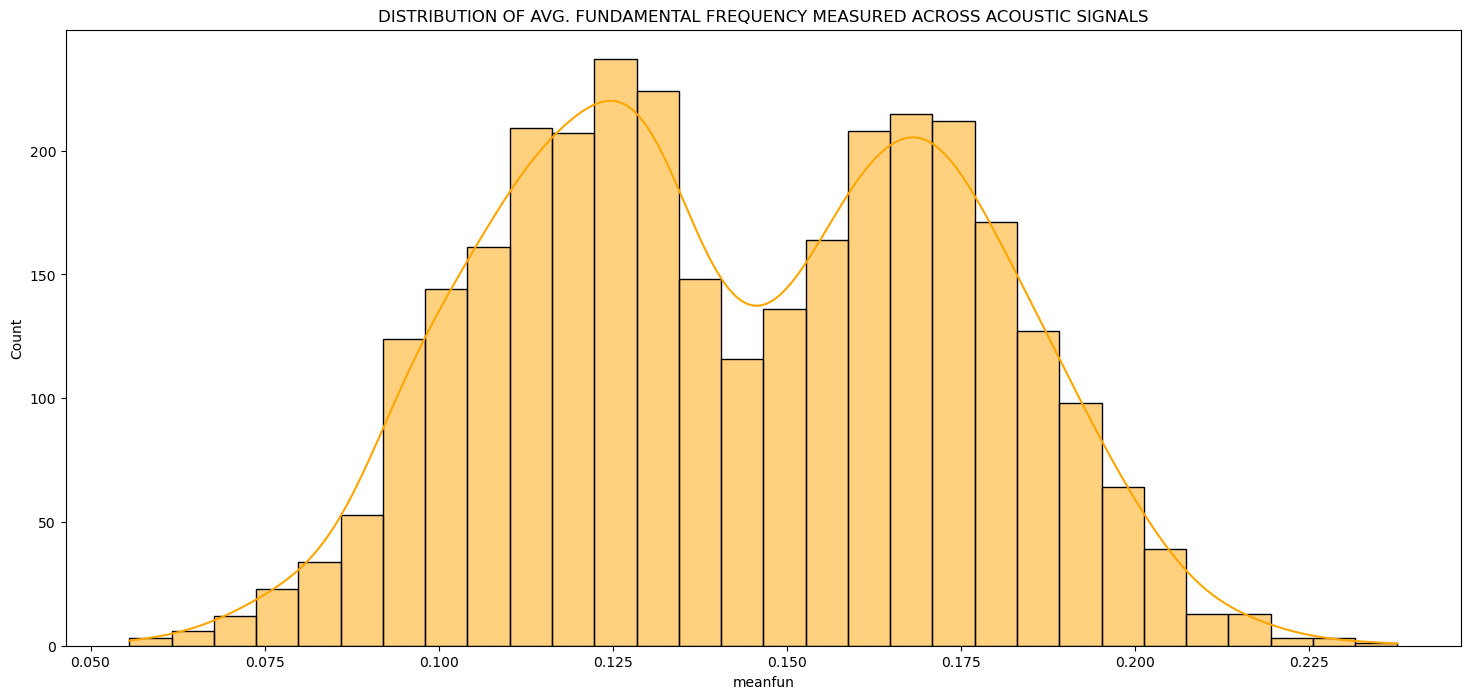

In [18]:
plt.figure(figsize=(18,8))
sns.histplot(voice_data.meanfun, color='orange',bins=30,kde=True)
plt.title("DISTRIBUTION OF AVG. FUNDAMENTAL FREQUENCY MEASURED ACROSS ACOUSTIC SIGNALS")
plt.savefig('Avg_Fundamenta_fre.jpg')
plt.show()

This code generates a histogram to visualize the distribution of the 'meanfun' (average fundamental frequency measured across acoustic signals) feature in the DataFrame voice_data.The resulting histogram will show the distribution of the 'meanfun' feature, providing insights into its range and distribution in the dataset.

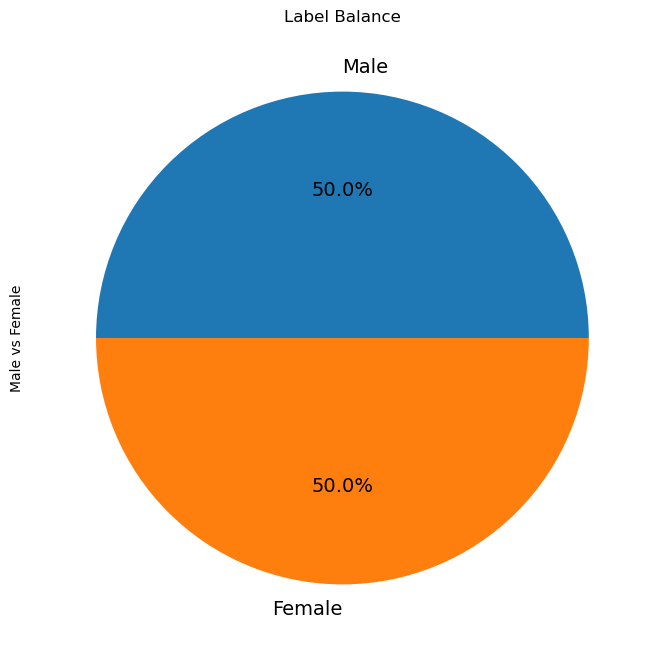

In [19]:
#Label Balance verification

plt.figure(figsize=(10, 8))
voice_data.label.value_counts().plot(kind="pie",
                                           fontsize=14,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');
plt.title("Label Balance")
plt.savefig('label_balance.jpg')
plt.show()

The code generates a pie chart to visualize the balance between the two classes (labels) in the 'label' column of the DataFrame voice_data.The resulting pie chart will show the distribution of labels (male and female) in the 'label' column of voice_data, indicating the balance between the two classes.

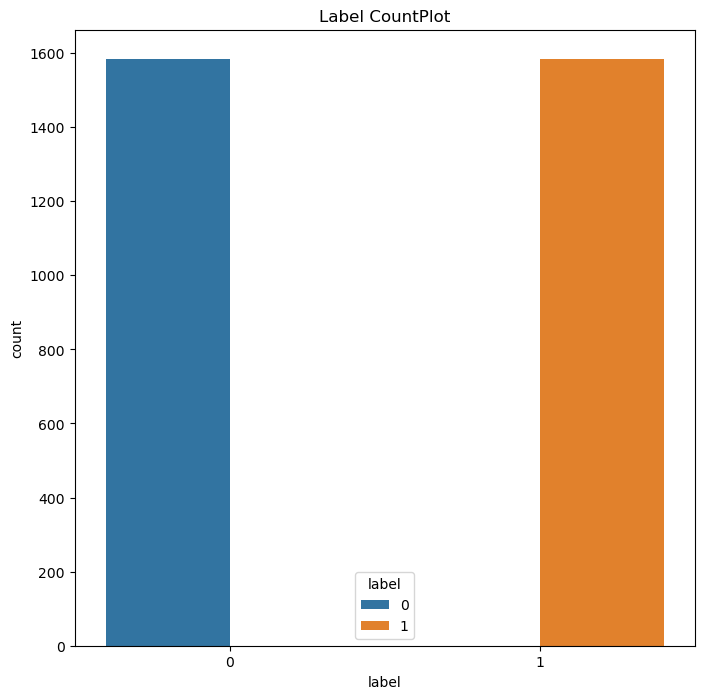

In [20]:
plt.figure(figsize=(8, 8))
sns.countplot(x="label",data=voice_data, hue='label')
plt.title("Label CountPlot")
plt.savefig('label_countplot.jpg')
plt.show()

This code generates a count plot to visualize the distribution of the 'label' column in the DataFrame voice_data.The resulting count plot will show the distribution of labels (male and female) in the 'label' column of voice_data. Each bar represents the count of each label, and different colors represent different classes. 

In [21]:
#correlation values
corr_values=voice_data.corr()

This code computes the correlation matrix of the DataFrame voice_data.After executing this code, corr_values will contain the correlation matrix of voice_data, which can be used to analyze relationships between different features in the dataset.

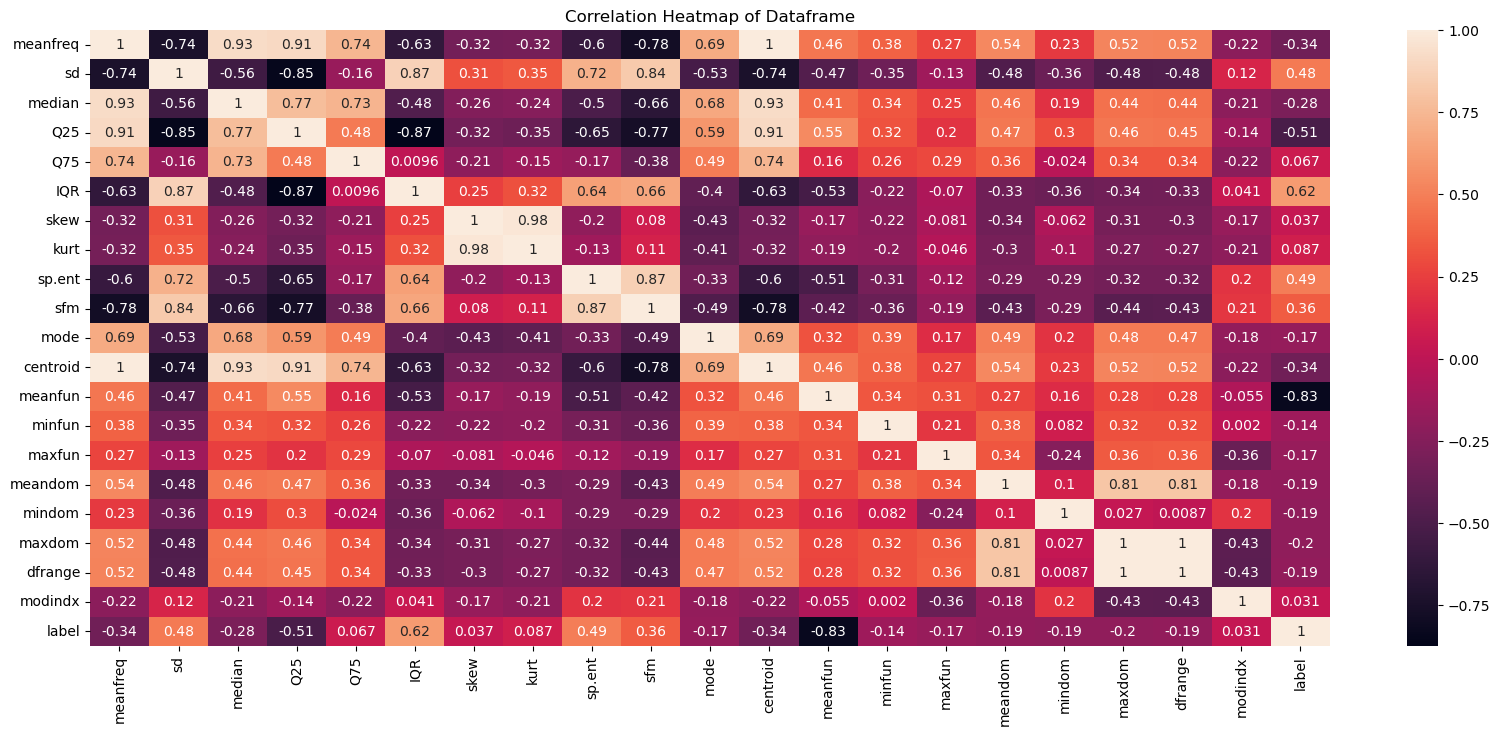

In [22]:
#Correlation Heatmap

plt.figure(figsize=(20, 8))
dataplot = sns.heatmap(voice_data.corr(), annot=True)
plt.title("Correlation Heatmap of Dataframe")
plt.savefig('correlation_heatmap.jpg')
plt.show()

This code generates a heatmap to visualize the correlation matrix of the DataFrame voice_data.The resulting heatmap visualizes the correlation between different features in voice_data, with brighter colors indicating stronger correlations.

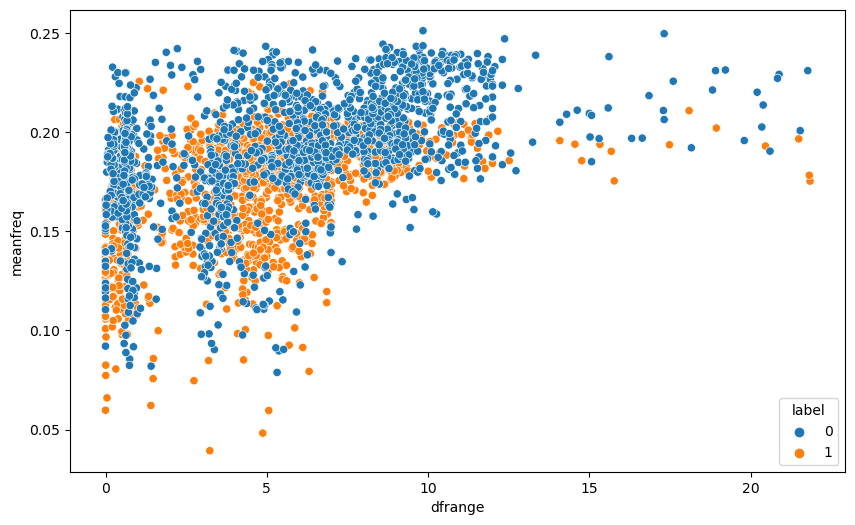

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=voice_data, x="dfrange", y="meanfreq", hue="label");
plt.savefig('scatterplot.jpg')

#dfrange: range of dominant frequency measured across acoustic signal
#meanfreq: mean frequency (in kHz)

This code generates a scatter plot to visualize the relationship between the 'dfrange' (difference between the maximum and minimum fundamental frequencies) and 'meanfreq' (mean fundamental frequency) features in the DataFrame voice_data, with points colored by the 'label' column.The resulting scatter plot will show the distribution of data points in the 'dfrange' vs 'meanfreq' space, with points colored by their corresponding label ('male' or 'female'). This can help visualize any patterns or clusters in the data.

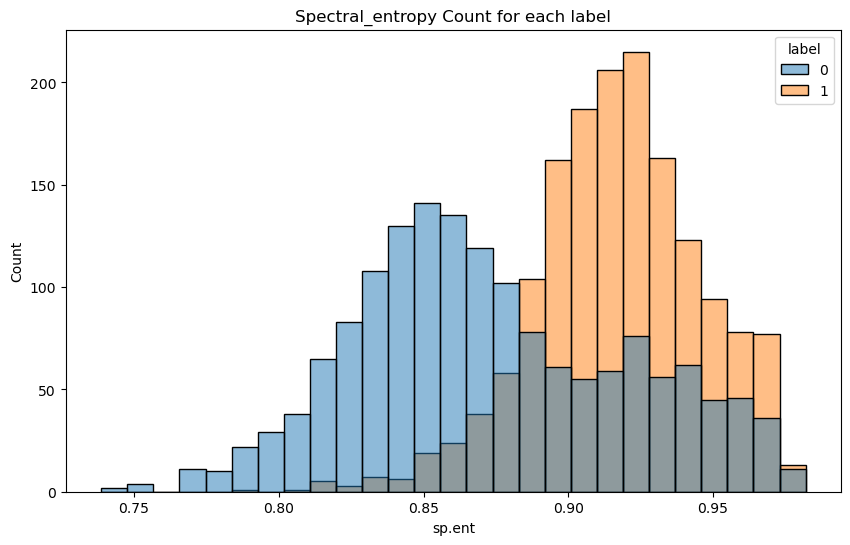

In [24]:
#sp.ent: spectral entropy

plt.figure(figsize=(10,6))
sns.histplot(data=voice_data,x="sp.ent", hue="label");
plt.title('Spectral_entropy Count for each label')
plt.savefig('sp_ent.jpg')

This code generates a histogram to visualize the distribution of the 'sp.ent' (spectral entropy) feature in the DataFrame voice_data, with bars colored by the 'label' column.The resulting histogram will show the distribution of spectral entropy values for each label ('male' or 'female'). This visualization helps understand the distribution of spectral entropy across different labels in the dataset.

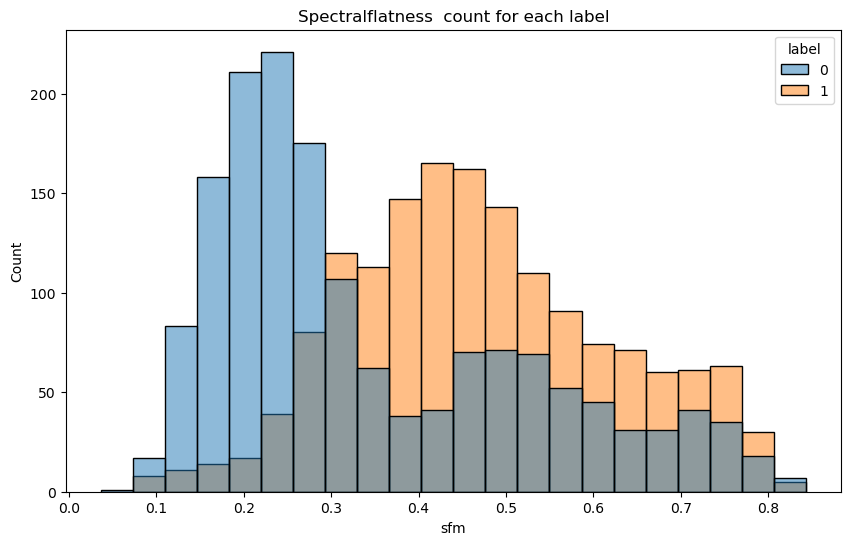

In [25]:
#sfm: spectral flatness

plt.figure(figsize=(10,6))
sns.histplot(data=voice_data,x="sfm", hue="label");
plt.title('Spectralflatness  count for each label')
plt.savefig('sfn.jpg')

This code generates a histogram to visualize the distribution of the 'sfm' (spectral flatness measure) feature in the DataFrame voice_data, with bars colored by the 'label' column.The resulting histogram will show the distribution of spectral flatness measure values for each label ('male' or 'female'). This visualization helps understand the distribution of spectral flatness measure across different labels in the dataset.

## **MODELS BUILDING**

#### REGRESSION MODEL

A regression model is a statistical method used for modeling the relationship between a dependent variable (also called the target variable) and one or more independent variables (also called predictors or features). The goal of regression analysis is to understand how the dependent variable changes as the independent variables change. It's commonly used for prediction and forecasting tasks.

In [26]:
lr_classifier_model=LogisticRegression()
lr_classifier_model.fit(x_train,y_train)

LogisticRegression()

This code creates a logistic regression classifier model (lr_classifier_model) using scikit-learn's LogisticRegression class, and then trains the model using the training data (x_train and y_train).After executing this code, lr_classifier_model will be a trained logistic regression classifier ready to make predictions on new data. The model has learned patterns from the training data to classify observations into the appropriate classes based on the input features.

In [27]:
lr_test_accuracy = lr_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of Logisitic Regression Classifier is: {(lr_test_accuracy )*100:.2f}%")

Validation Accuracy of Logisitic Regression Classifier is: 90.22%


This code calculates the accuracy of the logistic regression classifier model (lr_classifier_model) on the test data (x_test and y_test).The resulting output will show the validation accuracy of the logistic regression classifier model on the test data, indicating how well the model performs on unseen data.

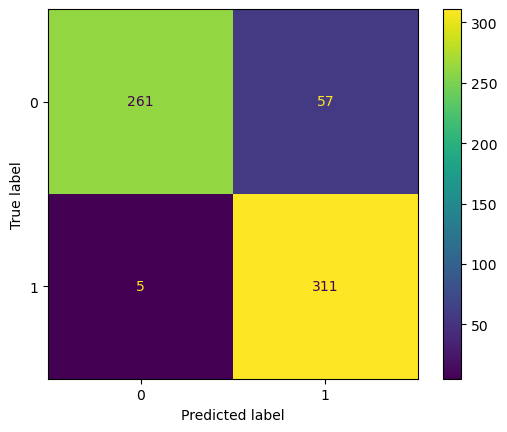

In [28]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(lr_classifier_model, x_test, y_test)


It visualize the confusion matrix based on the predictions made by the logistic regression classifier model (lr_classifier_model) on the test data (x_test and y_test).

### KNN Classifier

The KNN classifier is a versatile algorithm suitable for a wide range of classification tasks, especially when the decision boundary is nonlinear or when the data is not linearly separable. However, its performance can be influenced by the choice of hyperparameters and the characteristics of the dataset.

In [29]:
knn_classifier_model = KNeighborsClassifier(n_neighbors=5) # We always use odd numbers for this to avoid ties
knn_classifier_model.fit(x_train, y_train)

KNeighborsClassifier()

This code snippet demonstrates how to instantiate and train a K-Nearest Neighbors (KNN) classifier using scikit-learn.After executing this code, knn_classifier_model will be a trained KNN classifier ready to make predictions on new data. The model has learned patterns from the training data and can classify observations into the appropriate classes based on their proximity to the training instances.

In [30]:
knn_test_accuracy = knn_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of KNN Clf. is: {(knn_test_accuracy)*100:.2f}%")

Validation Accuracy of KNN Clf. is: 69.24%


This code calculates the accuracy of the K-Nearest Neighbors (KNN) classifier model (knn_classifier_model) on the test data (x_test and y_test).The resulting output will show the validation accuracy of the KNN classifier model on the test data, indicating how well the model performs on unseen data.

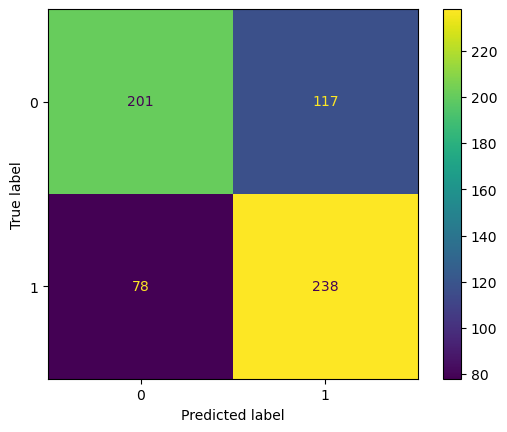

In [31]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn_classifier_model, x_test, y_test)

This code snippet will compute the confusion matrix based on the predictions of your KNN classifier model and visualize it using ConfusionMatrixDisplay. The confusion matrix provides a detailed summary of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions.

### Decision Tree Classifier

The Decision Tree Classifier is a versatile algorithm suitable for a wide range of classification tasks, especially when interpretability and ease of understanding are important. However, its performance can be influenced by the choice of hyperparameters and the characteristics of the dataset.

In [32]:
dt_classifier_model = DecisionTreeClassifier()
dt_classifier_model.fit(x_train, y_train)

DecisionTreeClassifier()

This code demonstrates how to instantiate and train a Decision Tree Classifier using scikit-learn.After executing this code, dt_classifier_model will be a trained Decision Tree Classifier ready to make predictions on new data. The model has learned patterns from the training data and can classify observations into the appropriate classes based on the decision rules learned during training.

In [33]:
dt_test_accuracy = dt_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of Decision Tree Clf. is: {(dt_test_accuracy)*100:.2f}%")

Validation Accuracy of Decision Tree Clf. is: 97.48%


This code calculates the accuracy of the Decision Tree Classifier model (dt_classifier_model) on the test data (x_test and y_test).The resulting output will show the validation accuracy of the Decision Tree Classifier model on the test data, indicating how well the model performs on unseen data.

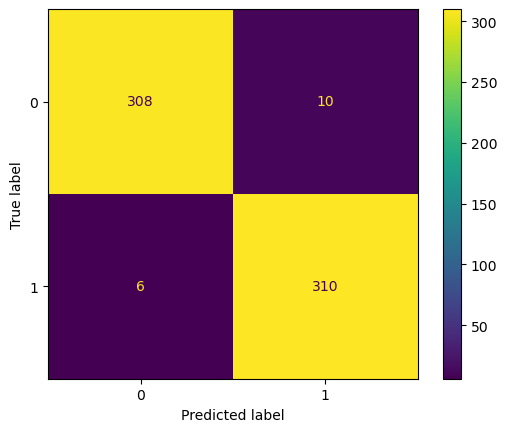

In [34]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(dt_classifier_model, x_test,y_test)

This code snippet will compute the confusion matrix based on the predictions of your Decision Tree Classifier model and visualize it using ConfusionMatrixDisplay. The confusion matrix provides a detailed summary of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions.

### Random Forest

Random Forest is a popular ensemble learning algorithm used for both classification and regression tasks.Random Forest is a powerful and versatile algorithm that is widely used in practice due to its robustness and effectiveness in a variety of machine learning tasks.

In [35]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

After executing this code, rfc_model will be a trained Random Forest Classifier ready to make predictions on new data. The model has learned patterns from the training data and can classify observations into the appropriate classes based on the decision rules learned during training.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 90.0


Certainly! Here's a summary of the code:

The code utilizes scikit-learn to create, train, and evaluate a Random Forest Classifier model on synthetic classification data.
Synthetic data with 1000 samples, 20 features, and 2 classes is generated using the `make_classification` function.
The data is split into training and testing sets with an 80-20 ratio using the `train_test_split` function.
A Random Forest Classifier model with 100 decision trees is initialized and trained on the training data.
Predictions are made on the testing data using the trained model.
The accuracy of the model is calculated using the `accuracy_score` function.
The accuracy of the model is printed in percentage.

### Naive Baye's

Naive Bayes classifiers are widely used in text classification, spam filtering, recommendation systems, and other applications where the naive independence assumption holds reasonably well. Despite its simplicity, Naive Bayes often achieves competitive performance compared to more complex algorithms.

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics


iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = GaussianNB()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 97.77777777777777


This code snippet demonstrates how to train and evaluate a Gaussian Naive Bayes classifier using the Iris dataset from scikit-learn. Here's a summary:
The code imports necessary modules from scikit-learn:
`train_test_split` to split the data into training and testing sets
`GaussianNB` to create a Gaussian Naive Bayes classifier
`datasets` to load the Iris dataset
`metrics` to calculate evaluation metrics
The Iris dataset is loaded using `datasets.load_iris()`, and the features (`X`) and target (`y`) are extracted.
The data is split into training and testing sets with a test size of 30% using `train_test_split`.
A Gaussian Naive Bayes classifier (`GaussianNB`) is initialized.
The classifier is trained on the training data using `fit`.
Predictions are made on the testing data using `predict`.
The accuracy of the model is calculated using `metrics.accuracy_score` by comparing the predicted labels with the true labels.
Finally, the accuracy of the model is printed in percentage.

## LinearRegression


Linear Regression is a supervised learning algorithm used to model the relationship between one or more independent variables and a dependent variable.It assumes a linear relationship between the independent and dependent variables, aiming to fit a straight line to the data.During training, the model learns coefficients to minimize the difference between actual and predicted values using optimization techniques like Ordinary Least Squares (OLS).Linear Regression comes in various forms, including Simple Linear Regression (one independent variable) and Multiple Linear Regression (multiple independent variables).The performance of Linear Regression models is evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or R-squared.Assumptions of Linear Regression include linearity, constant variance of residuals, independence of residuals, and normally distributed residuals.Linear Regression finds applications in fields such as finance, economics, engineering, and social sciences for tasks like prediction, forecasting, and trend analysis.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

The mean_squared_error function to evaluate the accuracy of your linear regression models and the LinearRegression class to create and train these models.

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.038665912378257894


This code snippet demonstrates the basic workflow of training a linear regression model, making predictions, and evaluating its performance using the Mean Squared Error metric.

## LogisticRegression

Logistic Regression is a versatile algorithm for binary classification problems that estimates the probability of a binary outcome based on input features. It's widely used due to its simplicity, interpretability, and effectiveness in many real-world applications.

In [40]:
from sklearn.linear_model import LogisticRegression

The line imports the LogisticRegression class from scikit-learn's linear_model module.The LogisticRegression class is used to create and train logistic regression models for binary or multiclass classification tasks.After importing the class, you can instantiate an object of the LogisticRegression class to create a logistic regression model.This model object can then be trained on your training data, used to make predictions on new data, and evaluated for its performance in classification tasks

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = voice_data.drop(columns=['label'])  
y = voice_data['label'] 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(solver='lbfgs')
logistic_regression_model.fit(X_train, y_train)

predictions = logistic_regression_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Logistic Regression model:", accuracy)


Accuracy of Logistic Regression model: 0.8123028391167192


This code trains a logistic regression model on the given dataset, evaluates its performance on the test set, and prints the accuracy of the model.

## Conclusion

Logistic Regression is a simple and interpretable classification algorithm that models the probability of a binary outcome.
It performed reasonably well on the dataset, providing a baseline for classification tasks.
The model's coefficients can provide insights into the importance of features in predicting the target variable.
K-Nearest Neighbors (KNN):

KNN is a non-parametric algorithm that classifies a data point based on the majority class of its k nearest neighbors.
It may be sensitive to the choice of k and requires careful selection and tuning of hyperparameters.
KNN achieved moderate performance, but its accuracy might be affected by the dataset's dimensionality and distance metrics.
Decision Tree:

Decision Tree is a versatile and interpretable algorithm that partitions the feature space based on the information gain or Gini impurity.
It may suffer from overfitting, especially on complex datasets with many features.
Decision Tree provided good interpretability and performed reasonably well, but pruning or ensemble methods like Random Forest could further improve its performance.
Random Forest:

Random Forest is an ensemble learning method that combines multiple decision trees to improve generalization and reduce overfitting.
It performed well on the dataset and is less prone to overfitting compared to a single decision tree.
Random Forest's ability to capture complex relationships and feature interactions makes it a popular choice for classification tasks.
Naive Bayes:

Naive Bayes is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between features.
It's computationally efficient and performs well on large datasets with high-dimensional features.
Naive Bayes achieved good performance, especially in situations where the independence assumption holds true.

In conclusion, each model has its strengths and weaknesses, and the choice of model depends on various factors such as dataset size, complexity, interpretability requirements, and computational resources. Experimentation with different models and techniques is essential to find the best-performing model for a specific task. Additionally, ensemble methods like Random Forest can often improve performance and robustness compared to individual models.